In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import netCDF4 as nc4

In [ ]:

class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)
    
    counter = 0
    # Loop until you find the end
    while len(open_list) > 0:
        counter+=1
        if counter%1000 ==0 : print("counter : %d" % (counter))
        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            print("counter : %d" % (counter))
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            #child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.h = 0.
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)
            
    

def main():

    maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

    start = (0, 0)
    end = (7, 6)

    path = astar(maze, start, end)
    print(path)


if __name__ == '__main__':
    main()



In [ ]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(maze, alpha = 0.1)
for obj in path:
    ax.scatter(obj[1],obj[0])
ax.grid(True,lw=1)
plt.show()

In [8]:
maze = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
Nx, Ny = np.shape(maze)
start = (0, 0) # j,i
end   = (7, 6) # j,i

def h(n,m=end):       # heurisitic distance
    #r = 0.            # case h = 0 -> Dijkstra
    r = np.sqrt((n[0]-m[0])**2 + (n[1]-m[1])**2)
    return(r)

def dist(c,n):
    r = np.max([np.abs(c[1]-n[1]), np.abs(c[0] - n[0]) ] )    # norm taxis
    return(r)

def in_map(node,maze):
    if (node[0] < 0 or node[0] >= Nx or \
        node[1] < 0 or node[1] >= Ny):
        return(False)
    else:
        return(True)

def add_tuple(a,b):
    return((a[0]+b[0], a[1]+b[1]))
    
#neighbors = np.arr 

In [9]:
error_flag = 0

class SetNode():
    
    def __init__(self):
        self.N     = 0
        self.listnode = []
        self.listnode_parent = []
    
    def add_node( self,node,parent= (-1,-1) ):
        self.N +=1
        self.listnode.append(node)
        self.listnode_parent.append(parent)

    def get_node(self,i):
        return( (self.listnode[i], self.listnode_parent[i]) )
    
    def change_parent(self,node,parent):
        for i,x in enumerate(self.listnode):
            if x == node:
                self.listnode_parent[i]=parent
    
    def get_father(self,node):
        for i,x in enumerate(self.listnode):
            if x == node:
                return(self.listnode_parent[i])
              
    def pop_node(self,i):
        if self.N == 0:
            error_flag = 1
            print("Set is empty, cannot pop a node (1)")
        else :
            self.N -= 1
            self.listnode.pop(i)
            self.listnode_parent.pop(i)
    
    def in_set(self, x):
        for node in self.listnode:
            if (x == node):
                return(True)
            else :
                return(False)
            
    def tree(self):   # build path from the last added
        node, parent = self.get_node(-1) 
        flag = 1 ; path=[parent,node]
        while flag :
            parent = self.get_father(parent)
            if parent==(-1,-1): 
                break
            path = [parent] + path
        return(path)


In [10]:
""" Initialisation """
# Start - visited but not expanded (succesors not explored yet) like a pending task, still possibilies
openSet = SetNode()
openSet.add_node(start)
# Close - visited and expanded
closSet = SetNode()
# comeFrom[n] is the preceding node coming from the cheapest path
comeSet = SetNode()

# gScore[n] is the cost from the start to n of the cheapest path
# map with inf for blocking walls
gmap = np.inf * np.ones(np.shape(maze))
gmap[start] = 0.

# fScore[n] = gScore[n] + h is the current best guess if it goes through n
fmap = np.inf * np.ones(np.shape(maze))
fmap[start] = h(start)

pathway = []
""" Run """
counter = 0
while openSet.N >0 :
#while counter<10 :
    # error test
    if error_flag != 0: break 
    counter +=1
        
    # switch to the node actually having the lowest score within the openSet (possibilities)
    f=[]
    for node in openSet.listnode :
        f+=[fmap[node]]
    current_i      = np.argmin(f)
    current,parent = openSet.get_node(current_i) 
    
    # current is explored : remove from openSet and add it to the closSet
    openSet.pop_node(current_i)
    closSet.add_node(current,parent)
        
    if current == end :   # end is reached !
        pathway = closSet.tree()
        print("counter : %d" % (counter))
        print(pathway)
        break
    #
    # build neighbors : adjacent nodes to the current (away from closed ones and borders)
    neighbors = []  #  -     /     |      \      -     /       |     \
    for adjacent in [(1,0),(1,1),(0,1),(-1,1),(-1,0),(-1,-1),(0,-1),(1,-1)]:
        
        ij = add_tuple(current,adjacent)
        
        if not in_map(ij,maze) : continue   # si hors champs, passe
            
        if maze[ij] : continue              # blocking wall
        
        if not closSet.in_set(ij) :         # puis, si dans closedset
            neighbors.append(ij)

    #print(fmap)
    #print(current)
    #print("neighbors",neighbors)
    #print("openSet",openSet.listnode)
    
    for nye in neighbors:
        
        t_gscore = gmap[current] + dist(current,nye) # estimate score to adjacent node and udate g, h , f
        
        if openSet.in_set(nye):    # if voisin est déjà dans openlist, passage par current moins cher, update
            if t_gscore<gmap[nye]:
                gmap[nye] = t_gscore         
                fmap[nye] = t_gscore + h(nye)
                openSet.change_parent(nye,current)
            else : 
                continue 
        else :                     # if not, add nye to the openlist
            openSet.add_node(nye,current)                  # accessed from current
            gmap[nye] = t_gscore                           # (important) update distance from start going through current
            fmap[nye] = t_gscore + h(nye)

counter : 8
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 3), (5, 4), (6, 5), (7, 6)]


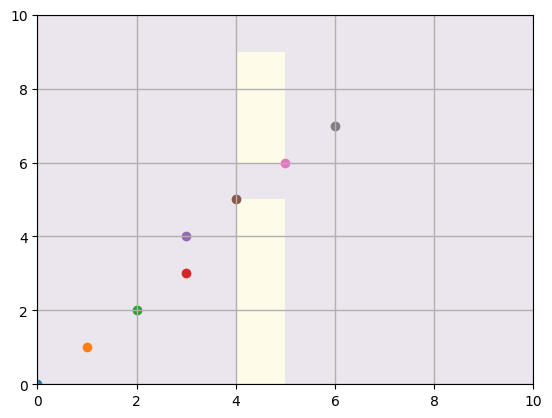

In [11]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(maze, alpha = 0.1)
for obj in pathway:
    ax.scatter(obj[1],obj[0])
ax.grid(True,lw=1)
plt.show()